### Block 1: Importer les bibliothèques

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Block 2: Créer et visualiser les données

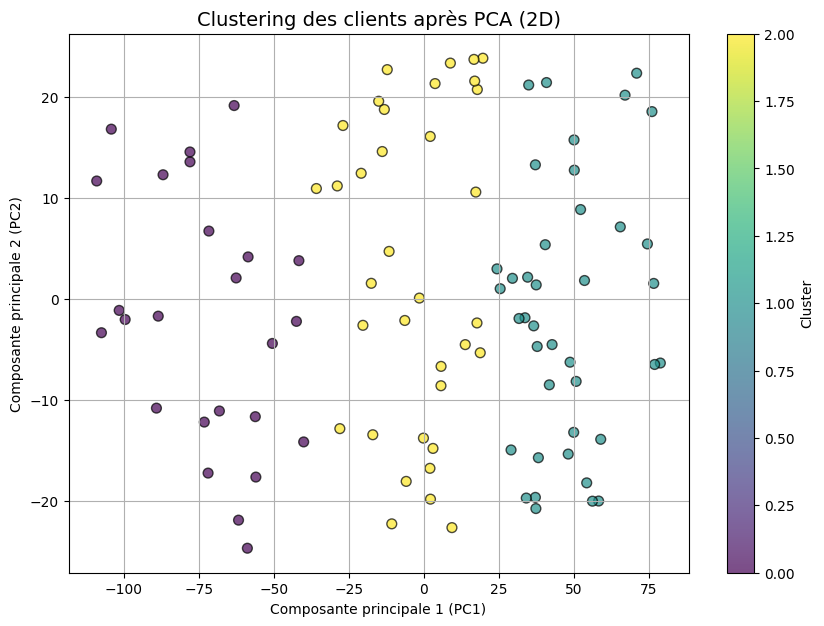

In [6]:
# Génération de données synthétiques pour simuler les comportements des clients
np.random.seed(42)  # Pour des résultats reproductibles

# Génération de 100 clients avec des caractéristiques aléatoires
n_clients = 100
ages = np.random.randint(18, 65, size=n_clients)  # Âge entre 18 et 65 ans
purchase_frequencies = np.random.randint(1, 20, size=n_clients)  # Fréquence d'achat entre 1 et 20
average_spends = np.random.randint(10, 200, size=n_clients)  # Dépense moyenne entre 10€ et 200€

# Création d'un DataFrame
data = {
    "Age": ages,
    "Purchase frequency": purchase_frequencies,
    "Average spend (€)": average_spends,
}
customers = pd.DataFrame(data)

# Application de K-means avec 3 clusters pour mieux identifier des groupes
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(customers)

# Ajout des labels de clusters au DataFrame
customers["Cluster"] = kmeans.labels_

# Réduction de dimension avec PCA pour une visualisation en 2D
pca = PCA(n_components=2)
customers_pca = pca.fit_transform(customers[["Age", "Purchase frequency", "Average spend (€)"]])

# Création d'un DataFrame PCA
pca_df = pd.DataFrame(customers_pca, columns=["PC1", "PC2"])
pca_df["Cluster"] = customers["Cluster"]

# Visualisation en 2D des clusters après PCA
plt.figure(figsize=(10, 7))
plt.scatter(
    pca_df["PC1"],
    pca_df["PC2"],
    c=pca_df["Cluster"],
    cmap="viridis",
    s=50,
    alpha=0.7,
    edgecolor="k"
)
plt.title("Clustering des clients après PCA (2D)", fontsize=14)
plt.xlabel("Composante principale 1 (PC1)")
plt.ylabel("Composante principale 2 (PC2)")
plt.colorbar(label="Cluster")
plt.grid()
plt.show()